In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
data_file = pd.ExcelFile('ECT.xlsx')

In [3]:
PartyList = data_file.parse(sheet_name='result_constituencies_PartyList', header=0)
Candidate = data_file.parse(sheet_name='result_constituencies_Candidate', header=0, usecols=[0,2,3,4,5])
constituency = data_file.parse(sheet_name='info_constituency',header=0)

In [4]:
#Candidate['cons_id'].value_counts()
#PartyList['cons_id'].value_counts()

In [5]:
result_All = pd.merge(PartyList,Candidate, on=('cons_id','party_id'), how='outer')
#print(result_All['cons_id'].value_counts()[result_All['cons_id'].value_counts()>67])

In [6]:
unique_result = [list(set( result_All[result_All['cons_id']=='CMI_7']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='CMI_7']['party_id']))[0],
                list(set( result_All[result_All['cons_id']=='NMA_1']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='NMA_1']['party_id']))[0],
                list(set( result_All[result_All['cons_id']=='PNB_4']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='PNB_4']['party_id']))[0],
                list(set( result_All[result_All['cons_id']=='CMI_6']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='CMI_6']['party_id']))[0]]

In [7]:
result_All = result_All.drop(result_All.index[result_All['party_id']==unique_result[1]])
result_All = result_All.drop(result_All.index[result_All['party_id']==unique_result[2]])
result_All = result_All.drop(result_All.index[result_All['party_id']==unique_result[3]])

In [8]:
#print(result_All[result_All['party_list_vote_percent']>99])
result_All = result_All.drop(result_All.index[result_All['cons_id']=='NST_6'])

In [9]:
#print(result_All[result_All['mp_app_vote_percent']>99])

In [10]:
#result_All_party_id_726 = result_All[result_All['party_id']==726]
#result_All_party_id_726 = result_All_party_id_726[['cons_id','party_id','party_list_vote_percent','mp_app_vote_percent']]
#sns.pairplot(result_All_party_id_726,hue='party_id')

In [11]:
#result_All_party_id_763 = result_All[result_All['party_id']==763]
#result_All_party_id_763 = result_All_party_id_763[['cons_id','party_id','party_list_vote_percent','mp_app_vote_percent']]
#sns.pairplot(result_All_party_id_763,hue='party_id')

In [12]:
#result_726_763_705 = result_All_party_id_726.append(result_All_party_id_763,ignore_index=True)
#result_726_763_705 = result_726_763_705.append(result_All[result_All['party_id']==705],ignore_index=True)
#sns.pairplot(result_726_763_705,hue='party_id')

In [13]:
for_check_vote = result_All[['cons_id','party_list_vote','mp_app_vote']]
check_vote = for_check_vote.groupby('cons_id')
vote = check_vote.sum()
new_column_names = {'party_list_vote': 'party_list_vote_turn_out', 'mp_app_vote': 'mp_app_vote_turn_out'}
vote = vote.rename(columns = new_column_names)
result_All = pd.merge(result_All, vote, on='cons_id', how='left')

def calculate_new_vote_percent(row):
    return (row['party_list_vote'] / row['party_list_vote_turn_out'])*100

result_All['new_party_list_vote_percent'] = result_All.apply(calculate_new_vote_percent,axis=1)

def calculate_new_mp_app_vote(row):
    return (row['mp_app_vote'] / row['mp_app_vote_turn_out'])*100

result_All['new_mp_app_vote_percent'] = result_All.apply(calculate_new_mp_app_vote,axis=1)

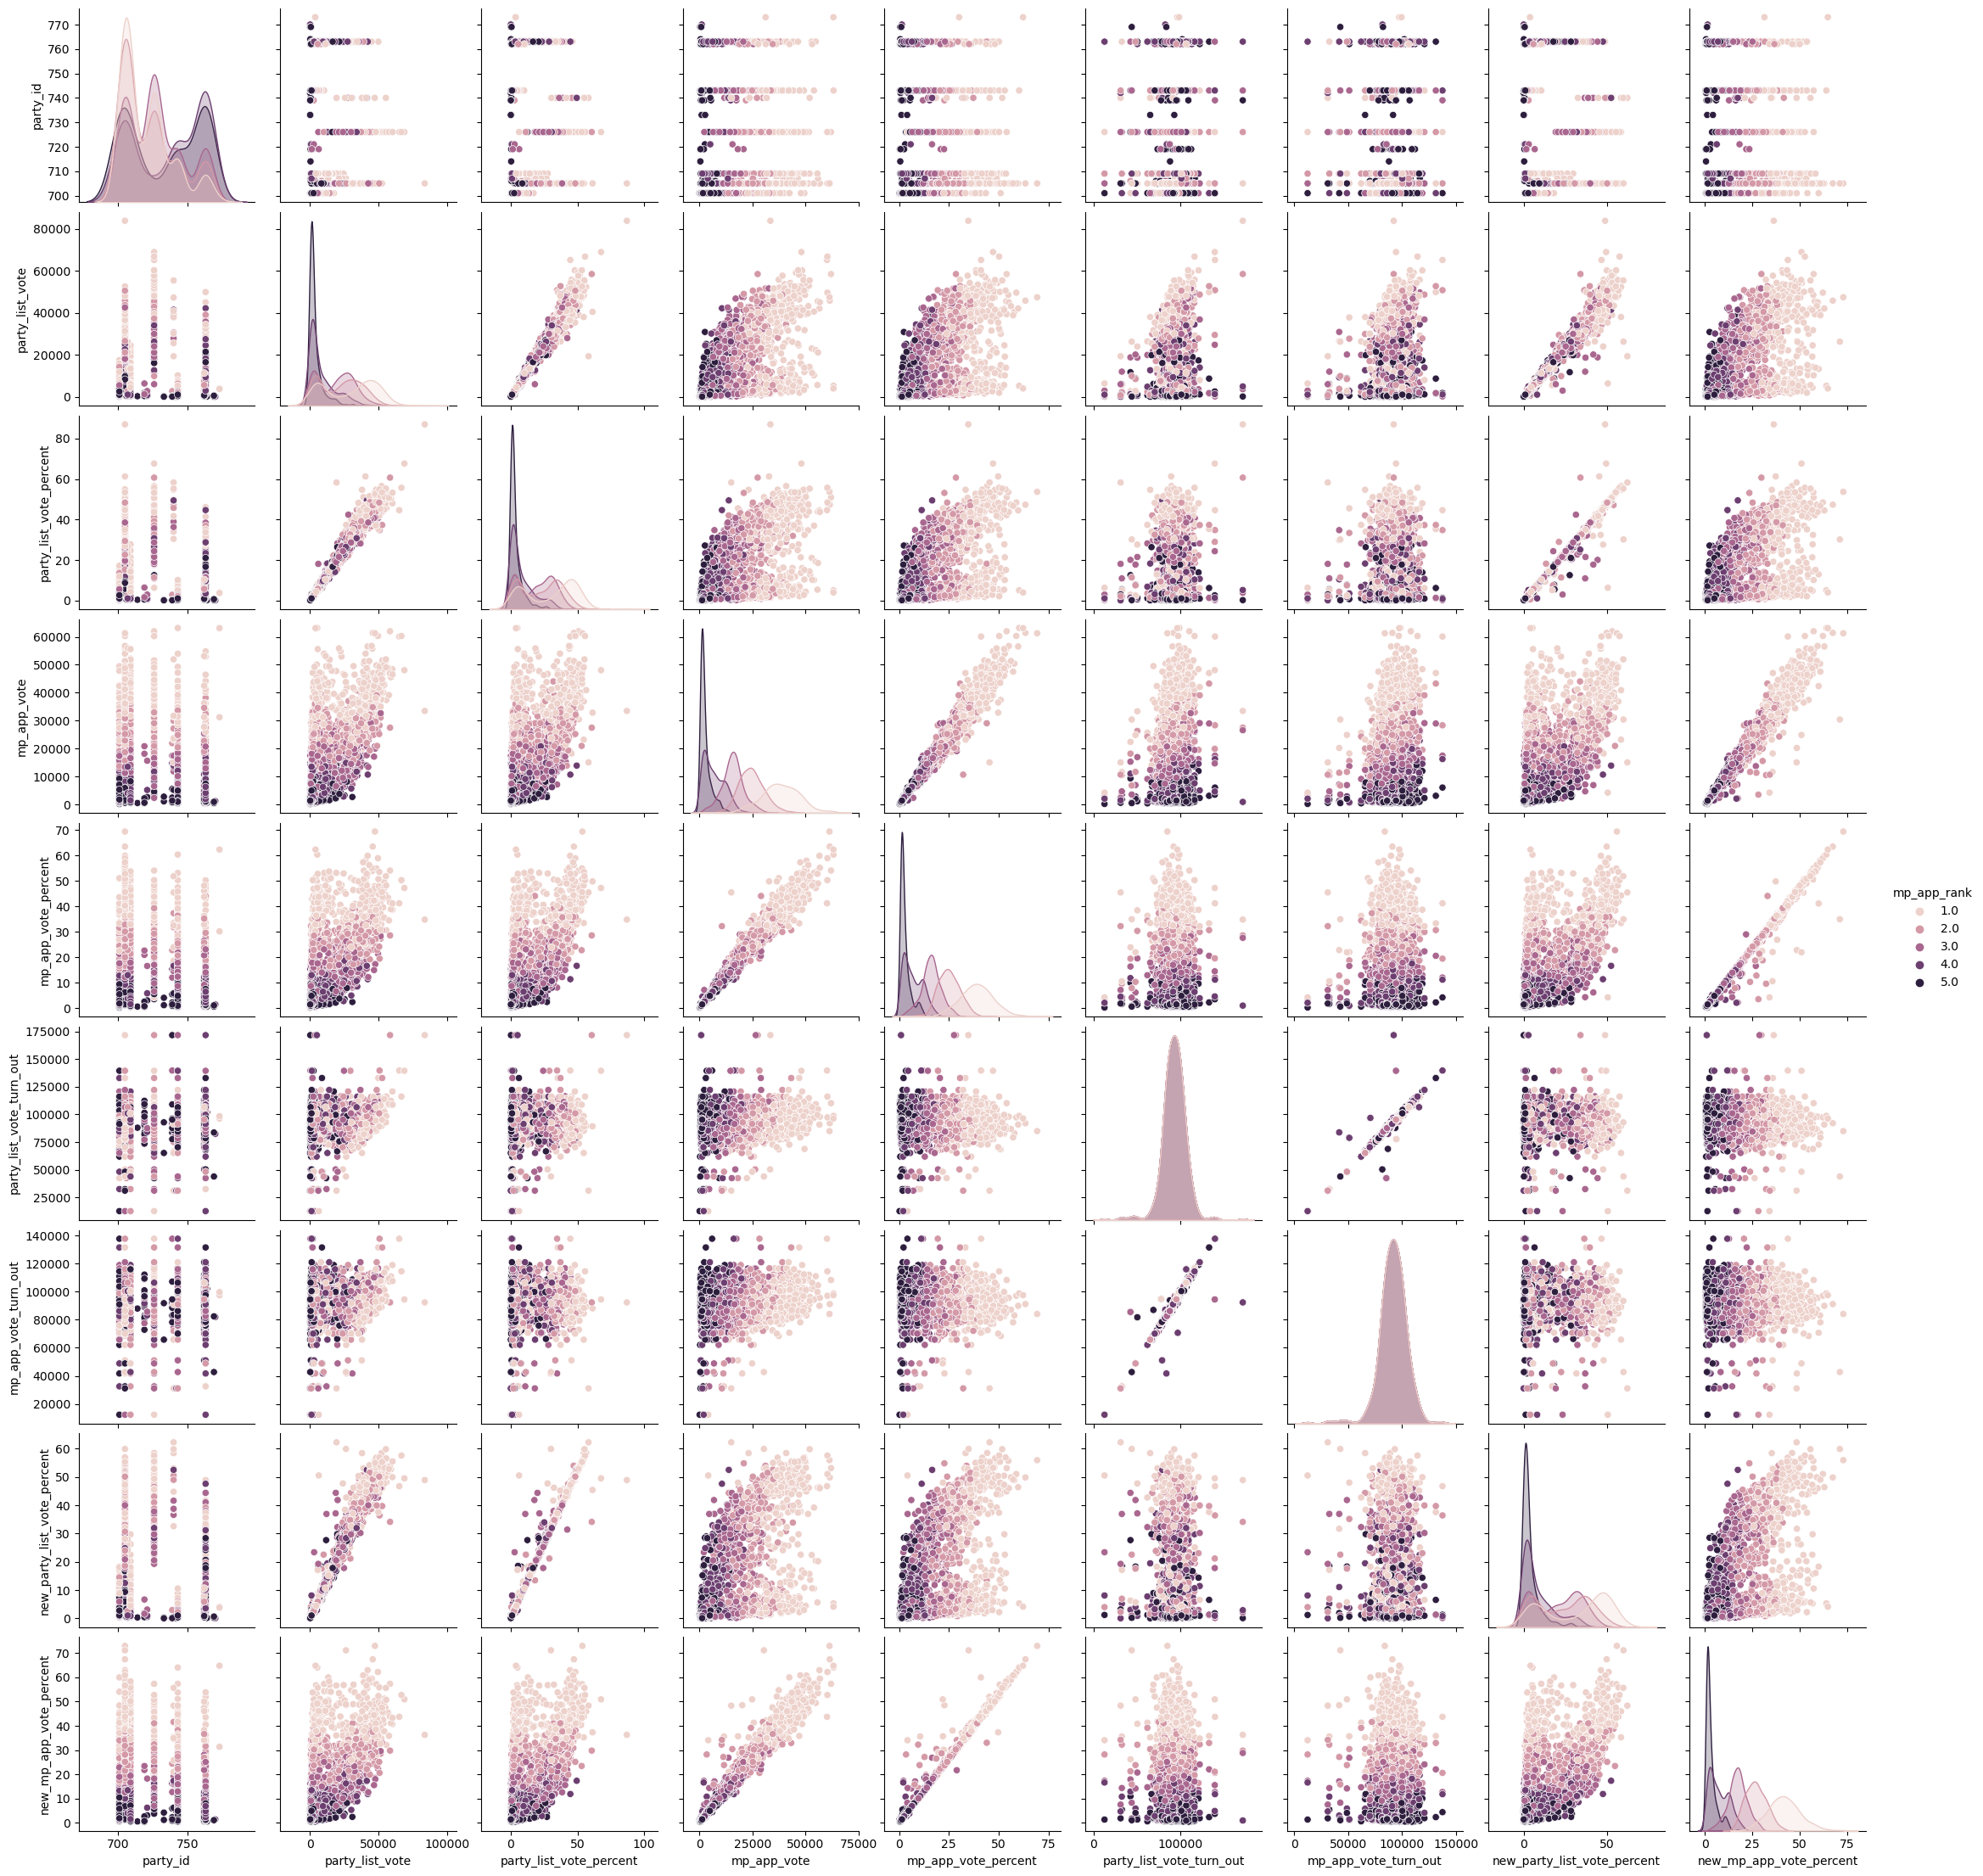

In [14]:
result_mp = result_All[result_All['mp_app_rank']<=5]
#result_mp = result_mp.drop('party_id', axis=1)
#result_mp = result_mp.drop('mp_app_vote', axis=1)
sns.pairplot(result_mp,hue='mp_app_rank')

In [15]:
#result_mp.loc[result_mp['mp_app_rank'] != 1, 'mp_app_rank'] =0

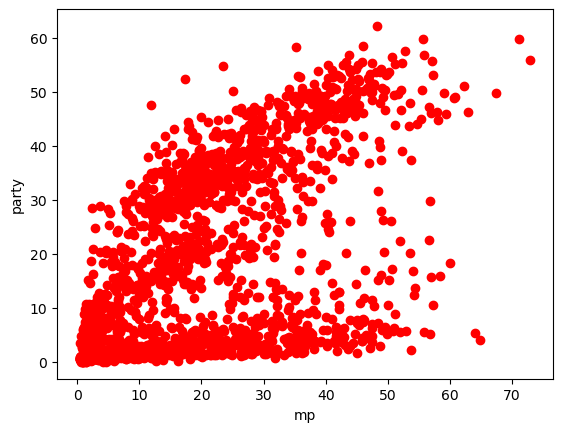

In [16]:
vote = result_mp['new_party_list_vote_percent'].values.reshape(-1,1) 
rank = result_mp['new_mp_app_vote_percent'].values.reshape(-1,1)
plt.ylabel('party')
plt.xlabel('mp')
plt.plot(rank,vote,'or')
plt.show()

In [17]:
train_rank,test_rank,train_vote,test_vote = train_test_split(rank,vote, test_size=0.2,random_state = 42)

In [18]:
print('Size of x training:',len(train_vote))
print('Size of y training:',len(train_rank))
print('Size of x testing:',len(test_vote))
print('Size of y testing:',len(test_rank))

Size of x training: 1595
Size of y training: 1595
Size of x testing: 399
Size of y testing: 399


In [19]:
model_linear = LinearRegression()
model_linear.fit(train_vote,train_rank)

print("Theta0: ",model_linear.intercept_[0])
print("Theta1: ",model_linear.coef_[0][0])
print("y = {:.4f}+{:.4f}x".format(model_linear.intercept_[0],model_linear.coef_[0][0]))

Theta0:  10.163780793431814
Theta1:  0.5343654875769221
y = 10.1638+0.5344x


In [20]:
y_pred = model_linear.predict(train_rank)

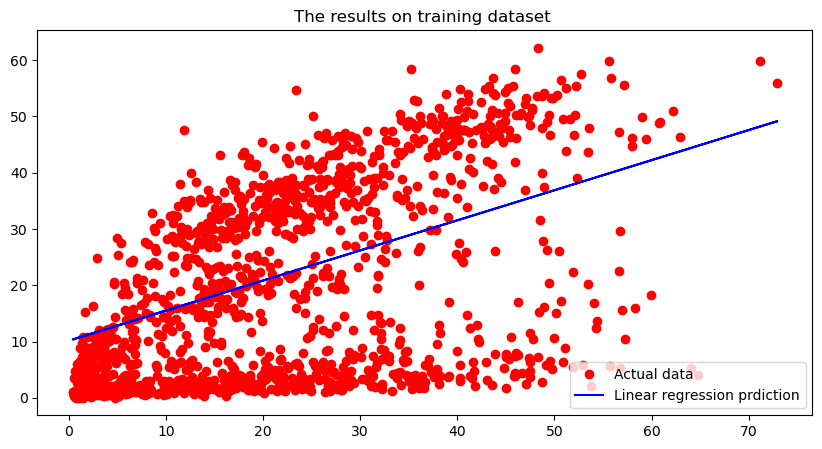

In [21]:
#Plot lineae regression line vs actual data on training set
plt.figure(figsize = (10,5))
plt.title('The results on training dataset ')
#plt.xlabel('คะแนน สส. บัญชีรายชื่อ')
#plt.ylabel('อันดับ สส.เขต ')
plt.plot(train_rank,train_vote,'or',label = 'Actual data')
plt.plot(train_rank,y_pred,'-b',label="Linear regression prdiction")
plt.legend(loc="lower right")
plt.show()

MAE =  12.3555
MSE =  200.6256
RMSE =  14.1642
MAPE =  615.9992
R-Square =  0.5546


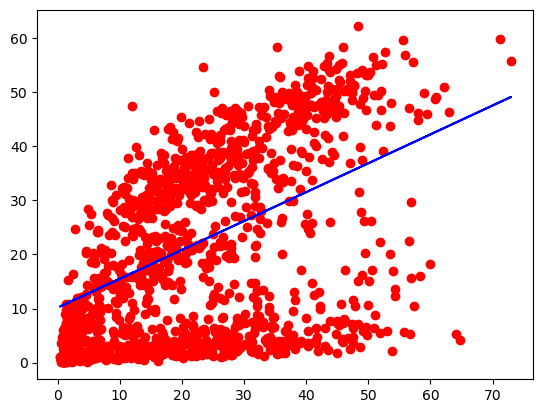

In [22]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

plt.plot(train_rank,train_vote,'or',label = 'Actual data')
plt.plot(train_rank,y_pred,'-b',label="Linear regression prdiction")

print("MAE = ",round(metrics.mean_absolute_error(train_vote,y_pred),4)) #mean absolute error
print("MSE = ",round(metrics.mean_squared_error(train_vote,y_pred),4)) #mean square error
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(train_vote,y_pred)),4)) #root mean square error
print("MAPE = ",round(MAPE(train_vote,y_pred),4)) #mean absolute percentage error
print("R-Square = ",round(np.sqrt(metrics.r2_score(train_vote,y_pred)),4)) #R-Square